# Árboles de decisión

Un **árbol de decisión** es un modelo de **aprendizaje automático** utilizado tanto para tareas de **clasificación** como de **regresión**, que toma decisiones en forma de una estructura en forma de árbol. Este modelo es particularmente útil cuando queremos entender cómo un conjunto de variables de entrada afecta una variable de salida, y es bastante fácil de interpretar. 

A diferencia de otros modelos, como los que utilizan redes neuronales, que desconocemos de fondo exactamente cómo están trabajando ya que siguen un modelo de "caja negra", los árboles de decisón pueden ser considerados como modelos de "caja blanca", en los cuales conocemos en detalle los criterios que utiliza el algoritmo para realizar una predicción o clasificación. Esto puede generar más confianza, en cierta forma, a la hora de mostrar el producto o modelo a un cliente que necesita estar al tanto de dichos detalles.

## ¿Cómo funciona un árbol de decisión?

Un árbol de decisión divide el espacio de características en diferentes regiones, y en cada una de ellas, hace una predicción de acuerdo con las características de los datos. La estructura del árbol se asemeja a un diagrama de flujo, donde cada **nodo interno** representa una "decisión" sobre una característica (o atributo), cada **rama** representa el resultado de esa decisión, y cada **hoja** representa una predicción o clase final.

### Elementos clave del árbol de decisión:

1. **Raíz (root)**:
   El nodo raíz es el primer nodo del árbol, donde comienza el proceso de decisión. A partir de aquí, el árbol se divide en función de las características de los datos.

2. **Nodos internos**:
   Cada nodo interno del árbol corresponde a una prueba de una característica del conjunto de datos (por ejemplo, "¿La edad es mayor que 30?"). Los nodos internos contienen decisiones que dividen el conjunto de datos en subconjuntos más pequeños.

3. **Hojas (leaves)**:
   Las hojas son los nodos terminales del árbol, que representan el valor o la clase que el modelo predice. Para un problema de **clasificación**, cada hoja corresponde a una clase (por ejemplo, "aprobado" o "reprobado"), y en **regresión**, la hoja contiene un valor numérico continuo.

4. **Ramas**:
   Las ramas del árbol representan las posibles decisiones o divisiones basadas en las pruebas realizadas en cada nodo interno.


## Contexto inicial para ejemplo con Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/ph/5sq6jlj161g1_2t838crnx6c0000gp/T/ipykernel_1375/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pacientes = pd.read_csv("../datos/pacientes.csv")
pacientes.head()

,edad,colesterol,problema_cardiaco
0,63,233,1
1,37,250,1
2,41,204,1
3,56,236,1
4,57,354,1


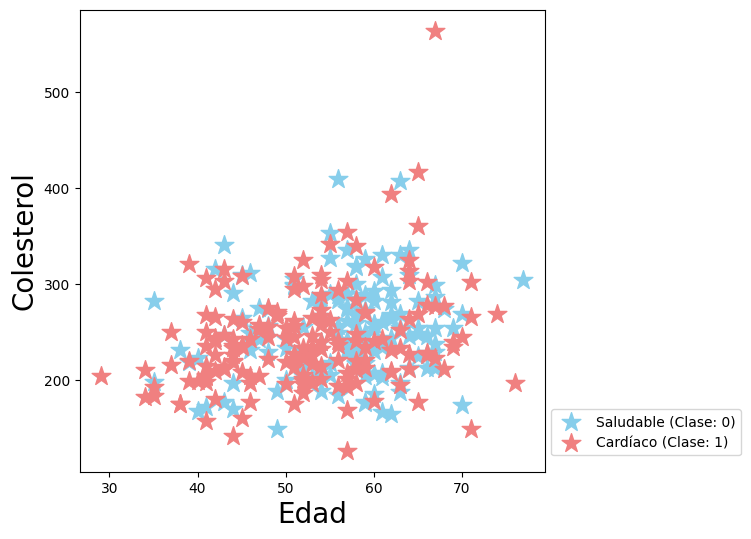

In [3]:
saludables = pacientes[pacientes["problema_cardiaco"] == 0]
cardiacos = pacientes[pacientes["problema_cardiaco"] == 1]

plt.figure(figsize=(6, 6))
plt.xlabel('Edad', fontsize = 20.0)
plt.ylabel('Colesterol', fontsize = 20.0)
plt.scatter(saludables["edad"], saludables["colesterol"], 
            label="Saludable (Clase: 0)", marker="*", c="skyblue", s=200)
plt.scatter(cardiacos["edad"], cardiacos["colesterol"],
            label="Cardíaco (Clase: 1)", marker="*", c="lightcoral", s=200)
plt.legend(bbox_to_anchor=(1, 0.15))
plt.show()

A simple vista, podemos ver que no existe con claridad una "línea imaginaria" que permita vincular ambas variables y partir de ello poder tal vez generar un modelo de regresión, por ej, logística aprovechando esa linealidad y tener nuestro algoritmo de clasificación.

En ese sentido, los árboles de decisión se tornan muy útiles.

### Entropía

La **entropía** es un concepto fundamental en la teoría de la información y se utiliza en varios campos, incluidos el aprendizaje automático y la teoría de la probabilidad. En términos generales, la entropía mide la **incertidumbre** o el **desorden** en un sistema. Es una medida de la cantidad de **información** contenida en un conjunto de datos o distribución de probabilidad.

#### Definición Formal de Entropía (en teoría de la información)

En el contexto de la teoría de la información, la **entropía** (denotada típicamente como $H(X)$) de una variable aleatoria $X$ mide la incertidumbre asociada con la variable. Se define como:

$H(X) = - \sum_{i=1}^{n} p(x_i) \log_2 p(x_i)$

Donde:
- $p(x_i)$ es la probabilidad de ocurrencia de cada evento $x_i$ (puede ser una clase, una palabra, un valor numérico, etc.).
- $\log_2$ es el logaritmo en base 2, ya que la entropía se mide en **bits** (la unidad básica de información).
- La suma se realiza sobre todas las posibles salidas de la variable aleatoria $X$.

#### Interpretación de la Entropía

- **Alta entropía**: Indica que el sistema está muy **desordenado** o que hay una alta **incertidumbre** sobre qué valor tomará la variable. En el contexto de un conjunto de datos, esto significa que las clases o los valores están muy **distribuidos** o son **poco predecibles**. Por ejemplo, si una moneda está equilibrada y tiene la misma probabilidad de salir cara o cruz, la entropía es máxima.
  
- **Baja entropía**: Indica que el sistema es más **predecible**. Si las probabilidades de las clases son muy desiguales (por ejemplo, 90% de las veces cara y 10% cruz), la entropía es baja, ya que sabemos con gran certeza qué valor tomará la variable.

#### Ejemplo de Entropía

Imaginemos que tenemos un conjunto de datos con una clase binaria (por ejemplo, **A** y **B**) y las probabilidades de que cada clase ocurra son las siguientes:

- Probabilidad de **A**: $p(A) = 0.5$
- Probabilidad de **B**: $p(B) = 0.5$

La entropía se calcula como:

$H(X) = - \left( 0.5 \log_2 0.5 + 0.5 \log_2 0.5 \right)$

$H(X) = - \left( 0.5 \times (-1) + 0.5 \times (-1) \right)$

$H(X) = 1 \, \text{bit}$

En este caso, la entropía es 1 bit, lo que refleja que la incertidumbre es máxima, ya que las probabilidades son iguales entre las dos clases.

Ahora, si tenemos una distribución en la que **A** es mucho más probable que **B**:

- Probabilidad de **A**: $p(A) = 0.9$
- Probabilidad de **B**: $p(B) = 0.1$

La entropía se calcula como:

$H(X) = - \left( 0.9 \log_2 0.9 + 0.1 \log_2 0.1 \right)$

$H(X) \approx - \left( 0.9 \times (-0.137) + 0.1 \times (-3.32) \right)$

$H(X) \approx 0.468 \, \text{bits}$

En este caso, la entropía es mucho menor (aproximadamente 0.468 bits), lo que refleja que el sistema es mucho más predecible.

#### Entropía en el Contexto de los Árboles de Decisión

En los **árboles de decisión**, la entropía se usa para medir la **impureza** de un conjunto de datos. Un conjunto de datos con **entropía baja** contiene clases que están bastante agrupadas (es decir, la mayoría de las instancias son de una sola clase), mientras que un conjunto con **alta entropía** contiene una mezcla casi equitativa de clases.

El objetivo en los árboles de decisión es **dividir** los datos de tal manera que las divisiones resultantes reduzcan la entropía, es decir, hacer que los subconjuntos sean lo más puros posible. La **ganancia de información** es la reducción de la entropía después de una división, y el algoritmo busca la característica que maximiza esta ganancia de información.

#### Fórmula para la Ganancia de Información

La **ganancia de información** es la reducción en la entropía después de dividir un conjunto de datos en función de una característica. Se calcula como:

$\text{Ganancia de Información} = H(D) - \sum_{i=1}^{k} \frac{|D_i|}{|D|} H(D_i)$

Donde:
- $H(D)$ es la entropía del conjunto de datos original.
- $H(D_i)$ es la entropía de los subconjuntos resultantes después de la división.
- $|D|$ es el tamaño del conjunto original, y $|D_i|$ es el tamaño de los subconjuntos.

La idea es **maximizar** la ganancia de información al seleccionar la característica que proporciona la división más pura, lo que implica reducir la entropía lo más posible.

#### Resumen

- La **entropía** mide la **incertidumbre** o el **desorden** de un sistema. En el contexto de aprendizaje automático, mide la impureza o mezcla de clases en un conjunto de datos.
- En los **árboles de decisión**, la entropía ayuda a determinar cómo dividir los datos en función de las características, buscando reducir la incertidumbre y mejorar la pureza de las clases.
- La **ganancia de información** es la reducción de la entropía que se logra al dividir los datos, y es el criterio utilizado en algoritmos como **ID3** para construir árboles de decisión.

#### Conceptos Relacionados:

- **Índice de Gini**: Otra medida de "impureza" utilizada en algunos algoritmos de árboles de decisión, similar a la entropía, pero con una fórmula diferente.
- **Reducción de la varianza**: En problemas de regresión, la reducción de la varianza es utilizada para dividir los datos de forma que se reduzca la incertidumbre sobre los valores continuos.

La entropía es, por tanto, una herramienta poderosa para entender y controlar la incertidumbre en el aprendizaje automático y en el análisis de datos.


In [4]:
from scipy.stats import entropy
from math import log

In [7]:
print(log(8, 2)) # 2 elevado a qué da 8

3.0


In [11]:
# Probabilidades para una moneda:

# Sistema impredecible, mayor entropia (y mayor info a almacenar, por ser mas impredecible)
# 0.5 que caiga cara
# 0.5 que caiga cruz
print(entropy([1/2, 1/2], base=2)) 

# Sistema mas predecible, menor entropia (y menor info a almacenar, por ser mas predecible)
# 0.6 que caiga cara
# 0.4 que caiga cruz
print(entropy([6/10, 4/10], base=2))

# Sistema mas predecible, menor entropia (y menor info a almacenar, por ser mas predecible)
# 1.0 que caiga cara
# 0.0 que caiga cruz
print(entropy([10/10, 0/10], base=2))

1.0
0.9709505944546688
0.0


In [13]:
edades = pd.Series([40, 30, 20, 50])
colesterol = pd.Series([100, 110, 100, 110])

print(edades.value_counts()/edades.size) # procentaje de aparicion de cada edad
print(colesterol.value_counts()/colesterol.size) # porcentaje de aparicion de cada colesterol
print(entropy(edades.value_counts()/edades.size, base=2)) # mayor entropia
print(entropy(colesterol.value_counts()/colesterol.size, base=2)) # menor entropia

40    0.25
30    0.25
20    0.25
50    0.25
Name: count, dtype: float64
100    0.5
110    0.5
Name: count, dtype: float64
2.0
1.0


Aquellas variables, características, atributos que presenten una mayor entropía son las que el algoritmo de árbol de decisión irá tomando para ir disminuyendo dicho nivel de entropía.

SI tomamos el simple ejemplo que vimos justo arriba, las edades presentaron una entropía de 2 contra el nivel de colesterol que presentó una entropía de 1. Entonces, si las edades tienen mayor entropía, el algoritmo comenzará con esta característica para el nodo inicial para dividir los datos. Por ejemplo, se determinará una edad y se ahí surgirán dos ramas: una para las edades iguales o menores a esa, y otra para las mayores. 

De los subconjuntos originados, se medirá nuevamente la entropía de cada uno y el algoritmo analizará qué característica y valor tomar ahora para un nuevo nodo, y así sucesivamente hasta llegar a los nodos terminales (hojas) con el resultado, ya sea una clasificación o una predicción numérica.

![Árbol de decisión - Ejemplo](./img/arbol_decision1.png)

## Datos de entrenamiento y prueba

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    pacientes[["edad", "colesterol"]],
    pacientes["problema_cardiaco"],
    test_size=0.3
)

## Creación del Árbol de Decisión

In [16]:
from sklearn import tree

Al momento de crear una instancia de árbol de decisión, instancia que luego se entrenará con nuestro datos, por un lado tenemos distintos tipos de instancias según el obejtivo del modelo (clasificar o predecir mediante alguna regresión), y por otro lado, algo muy importante, es el nivel de profundidad que se le asignará al árbol.

Si nosotros por defecto no le asignamos ningún nivel de profundidad máximo que puede alcanzar el árbol, el algoritmo generará tantos niveles como crea convenientes en funciçon de los datos de entrenamiento, y aún en los casos más simples (como este que estuvimos viendo) creará un árbol de decisión con muchas ramificaciones que terminará estando sobreajustado a los valores específicos que se usaron para entrenarlo, y no será eficiente a la hora de generalizar. De allí la relevancia de establecer este nivel, como se hace a continuación, fijando por ejemplo un nivel máximo de 2.

0.6333333333333333
|--- Edad <= 57.50
|   |--- Colesterol <= 272.50
|   |   |--- class: 1
|   |--- Colesterol >  272.50
|   |   |--- class: 0
|--- Edad >  57.50
|   |--- Colesterol <= 347.50
|   |   |--- class: 0
|   |--- Colesterol >  347.50
|   |   |--- class: 1



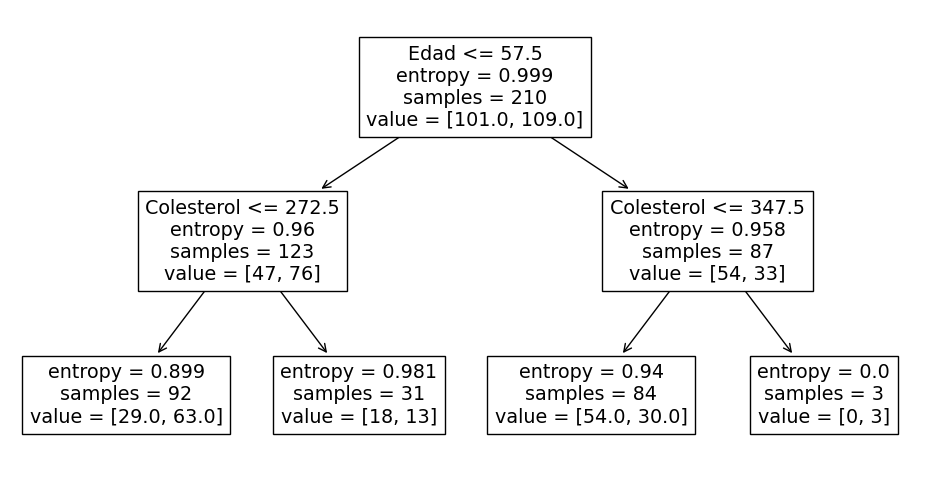

In [20]:
# elegimos este tipo de arbol (clasificador) por ser este un problema de clasificacion
arbol_decision = tree.DecisionTreeClassifier(criterion="entropy", 
                                            max_depth=2) 
arbol = arbol_decision.fit(datos_entrena, clase_entrena)
accuracy = arbol_decision.score(datos_prueba, clase_prueba)

print(accuracy)

print(tree.export_text(arbol, 
                      feature_names=["Edad", "Colesterol"])) # representacion en texto de nuestro arbol generado

plt.figure(figsize=(12, 6))
tree.plot_tree(arbol, 
               feature_names=["Edad", "Colesterol"]) # representacion grafica del arbol generado

plt.show()

## Clasifica nuevos pacientes

In [18]:
print("Nuevo paciente:", arbol_decision.predict([[70, 150]]))

Nuevo paciente: [0]


/Users/Loli/Library/Python/3.12/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
